# Exploratory Data Analysis (EDA)

This notebook explores the cleaned hotel dataset (without sentiment features)
to understand occupancy trends, pricing behaviour, and cancellation patterns
prior to predictive modelling.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("/content/eda_overview_ready (1).csv")

df.columns


Index(['HotelID', 'Month', 'OccupiedRoomNights', 'MonthStart', 'DaysInMonth',
       'TotalRooms', 'OccupancyRate', 'ADR', 'CancellationRate'],
      dtype='object')

In [ ]:
df.shape
df.info()
df.describe()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 962 entries, 0 to 961
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   HotelID             962 non-null    int64  
 1   Month               962 non-null    object 
 2   OccupiedRoomNights  962 non-null    int64  
 3   MonthStart          962 non-null    object 
 4   DaysInMonth         962 non-null    int64  
 5   TotalRooms          962 non-null    int64  
 6   OccupancyRate       962 non-null    float64
 7   ADR                 952 non-null    float64
 8   CancellationRate    952 non-null    float64
dtypes: float64(3), int64(4), object(2)
memory usage: 67.8+ KB


,HotelID,OccupiedRoomNights,DaysInMonth,TotalRooms,OccupancyRate,ADR,CancellationRate
count,962.000000,962.000000,962.000000,962.000000,962.000000,952.000000,952.000000
mean,20.415800,19.377339,30.419958,151.980249,0.004779,205.394496,0.219006
std,11.540982,9.527005,0.862164,49.376957,0.003123,40.806526,0.183896
min,1.000000,1.000000,28.000000,63.000000,0.000138,120.570000,0.000000
25%,10.000000,12.000000,30.000000,104.500000,0.002582,176.419500,0.000000
50%,20.000000,18.000000,31.000000,154.500000,0.004148,206.129250,0.200000
75%,30.000000,26.000000,31.000000,196.750000,0.006227,226.520000,0.333333
max,40.000000,53.000000,31.000000,241.000000,0.022017,297.690000,1.000000


## Monthly Occupancy Trend
This plot shows how average hotel occupancy varies over time,
highlighting potential seasonality and stability in demand.



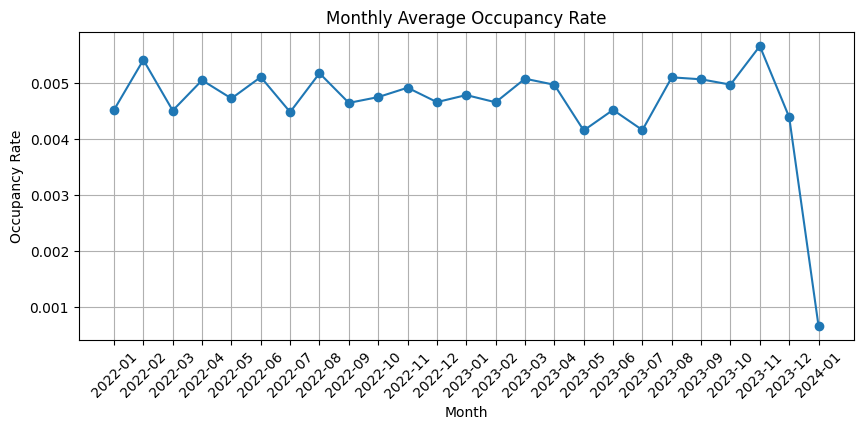

In [ ]:
monthly_occ = df.groupby("Month")["OccupancyRate"].mean().reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly_occ["Month"], monthly_occ["OccupancyRate"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Average Occupancy Rate")
plt.xlabel("Month")
plt.ylabel("Occupancy Rate")
plt.grid(True)
plt.show()


## ADR Distribution

This distribution illustrates the spread of Average Daily Rate (ADR) values
across all observations. Analysing ADR helps to understand pricing behaviour,
the presence of premium pricing, and whether room rates are skewed by outliers.


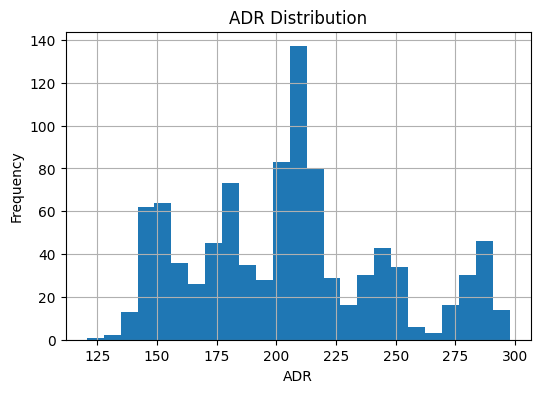

In [ ]:
plt.figure(figsize=(6,4))
plt.hist(df["ADR"], bins=25)
plt.title("ADR Distribution")
plt.xlabel("ADR")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()


## ADR vs Occupancy Rate

This scatter plot explores the relationship between room pricing (ADR) and
occupancy rate. The analysis helps assess whether higher prices are associated
with changes in occupancy, which is important for understanding demand
sensitivity to pricing.


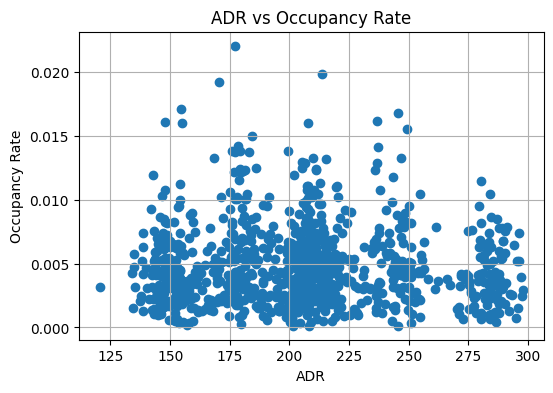

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["ADR"], df["OccupancyRate"])
plt.title("ADR vs Occupancy Rate")
plt.xlabel("ADR")
plt.ylabel("Occupancy Rate")
plt.grid(True)
plt.show()


## Monthly Cancellation Rate Trend

This plot shows how the average cancellation rate varies over time.
Examining cancellation behaviour provides insight into booking reliability
and potential seasonal or external factors influencing guest commitment.


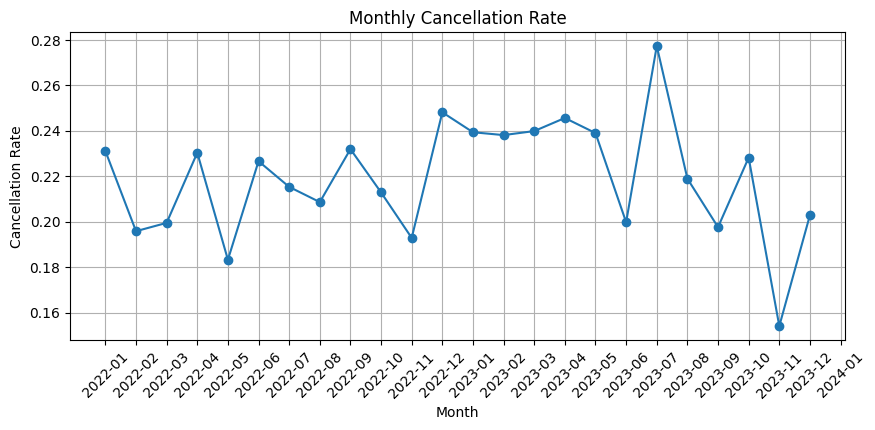

In [ ]:
monthly_cancel = df.groupby("Month")["CancellationRate"].mean().reset_index()

plt.figure(figsize=(10,4))
plt.plot(monthly_cancel["Month"], monthly_cancel["CancellationRate"], marker="o")
plt.xticks(rotation=45)
plt.title("Monthly Cancellation Rate")
plt.xlabel("Month")
plt.ylabel("Cancellation Rate")
plt.grid(True)
plt.show()


## Cancellation Rate vs Occupancy

This analysis investigates the relationship between cancellation rate and
occupancy. A negative relationship is expected, as higher cancellation rates
may reduce realised occupancy levels.


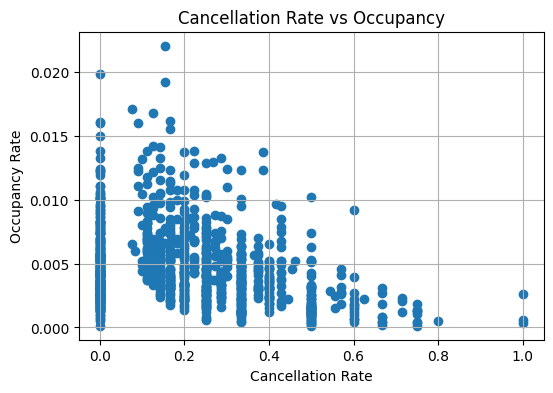

In [ ]:
plt.figure(figsize=(6,4))
plt.scatter(df["CancellationRate"], df["OccupancyRate"])
plt.title("Cancellation Rate vs Occupancy")
plt.xlabel("Cancellation Rate")
plt.ylabel("Occupancy Rate")
plt.grid(True)
plt.show()


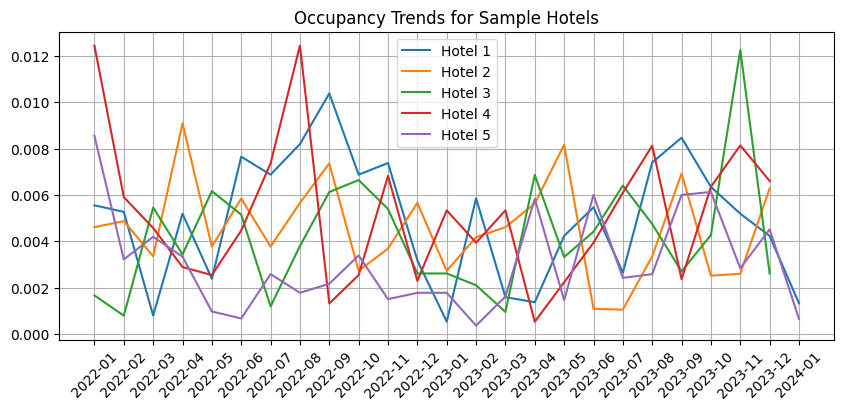

In [ ]:
sample_hotels = df["HotelID"].unique()[:5]

plt.figure(figsize=(10,4))
for h in sample_hotels:
    temp = df[df["HotelID"] == h]
    plt.plot(temp["Month"], temp["OccupancyRate"], label=f"Hotel {h}")

plt.xticks(rotation=45)
plt.title("Occupancy Trends for Sample Hotels")
plt.legend()
plt.grid(True)
plt.show()
